<a href="https://colab.research.google.com/github/Ash-42/Uni-Ranking-Analysis/blob/main/Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> To do for the team : <br>


**Data Wrangling**
1. Clean up data - remove NaN, null, missing and '-' values
2. Create separate dataframes for each year
3. Check for typos and inconsistent capitalization (research how to do that)
**Data Visualization**
1. Create separate graphs for each dataframe(year)
2. Extract insights (look for a story)
3. Find and filter outliers <br>
<t> a) Numerical – Box plot / Histogram <br>
b) Categorical – Bar chart.



In [775]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [776]:
# Load the dataset
path = "/content/uni_rankings_dataset.csv"
data = pd.read_csv(path)

# View feature names and the top 10 instances
data.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


###Exploratory Data Analysis


In [777]:
# (instances, features)
print(data.shape)
print(data.info())

(2603, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), obje

#### Feature Analysis

1. `world_rank` : World rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250)
2. `university_name` : Name of the university
3. `country` : Country of each university
4. `teaching` : University score for teaching (the learning environment)
5. `international` : University score for international outlook (students, staff, reasearch)
6. `research` : University score for research (volume, income and reputation)
7. `citations` : University score for citations (research influence)
8. `income` : University score for industry income (knowledge transfer)
9. `total_score` : Total score for university, used to determine rank
10. `num_students` : Number of students at the university
11. `student_staff_ratio` : Ratio of students to staff at the university
12. `international_students` : Percentage of students of international origin
13. `female_male_ratio` : Ratio of female students to male students in the university
14. `year` : Year of publishing rankings

#### String Processing


In [778]:
# Data contains '-' values, assign as NaN
data.replace('-', np.NaN, inplace=True)

In [779]:
# Process num_students
print("Before processing: ")
print(*data.num_students.values[:30], sep=", ")
print("\n")

# Replace commas with empty string
data.num_students = [i.replace(',', '') if isinstance(i, str) else i for i in data.num_students.values]

print("After processing 'num_students': ")
print(*data.num_students.values[:30], sep=", ")

Before processing: 
20,152, 2,243, 11,074, 15,596, 7,929, 18,812, 19,919, 36,186, 15,060, 11,751, 38,206, 14,221, 15,128, 21,424, 18,178, 41,786, 66,198, 25,055, 20,376, 11,885, 19,835, 26,607, 44,020, 15,172, 18,334, 26,199, 19,967, 3,055, 22,020, 50,152


After processing 'num_students': 
20152, 2243, 11074, 15596, 7929, 18812, 19919, 36186, 15060, 11751, 38206, 14221, 15128, 21424, 18178, 41786, 66198, 25055, 20376, 11885, 19835, 26607, 44020, 15172, 18334, 26199, 19967, 3055, 22020, 50152


In [780]:
# Process international_students
print("Before processing: ")
print(*data.international_students.values[:30], sep=", ")
print("\n")

# Remove percentage symbols from the 'international_students' feature
data.international_students = [i[ : -1] if isinstance(i, str) else i for i in data.international_students.values]

print("After processing 'international_students': ")
print(*data.international_students.values[:30], sep=", ")

Before processing: 
25%, 27%, 33%, 22%, 27%, 34%, 34%, 15%, 51%, 20%, 15%, 21%, 23%, 19%, 37%, 16%, 15%, 28%, 20%, 35%, 38%, 46%, 13%, 17%, 15%, 10%, 26%, 4%, 11%, 25%


After processing 'international_students': 
25, 27, 33, 22, 27, 34, 34, 15, 51, 20, 15, 21, 23, 19, 37, 16, 15, 28, 20, 35, 38, 46, 13, 17, 15, 10, 26, 4, 11, 25


In [781]:
# Process female_male_ratio
print("Before processing: ")
print(*data.female_male_ratio.values[ : 20], sep=", ")
print("\n")

# Rename column name
data.rename(columns={'female_male_ratio' : 'female_ratio'}, inplace=True)

# Convert ratio to decimal
data.female_ratio = [('0.'+i[ : 2]) if isinstance(i, str) else i for i in data.female_ratio]

print("After processing 'female_ratio': ")
print(*data.female_ratio.values[ : 20], sep=", ")

Before processing: 
nan, 33 : 67, 37 : 63, 42 : 58, 45 : 55, 46 : 54, 46 : 54, 50 : 50, 37 : 63, 50 : 50, 52 : 48, 42 : 58, 50 : 50, 48 : 52, 31 : 69, 48 : 52, nan, nan, 51 : 49, 39 : 61


After processing 'female_ratio': 
nan, 0.33, 0.37, 0.42, 0.45, 0.46, 0.46, 0.50, 0.37, 0.50, 0.52, 0.42, 0.50, 0.48, 0.31, 0.48, nan, nan, 0.51, 0.39


In [782]:
# Process world_rank
# TO DO
print(*data.world_rank, sep=' ')

1 2 3 4 5 6 6 8 9 10 11 12 13 14 15 15 17 18 19 20 21 22 23 24 25 26 27 28 29 30 30 32 33 34 35 36 37 38 39 40 41 42 43 43 43 43 47 48 49 49 51 52 53 54 55 56 57 58 59 60 61 61 63 64 65 66 67 68 68 68 71 72 73 73 75 76 77 78 79 79 81 81 83 83 85 86 87 88 89 90 90 90 93 94 95 95 95 98 99 100 101 102 103 104 105 106 107 107 109 109 111 112 112 114 115 115 117 118 119 120 120 122 122 124 124 124 127 128 129 130 130 132 132 132 135 136 137 138 139 140 140 142 143 144 145 145 147 147 149 149 151 152 152 152 155 156 156 158 159 159 161 161 163 164 165 165 167 168 168 170 171 172 173 174 174 174 177 178 178 178 181 182 183 184 185 186 187 187 189 190 190 190 193 193 195 196 197 197 199 199 1 2 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 38 40 41 42 43 44 45 46 47 48 49 49 51 52 53 54 55 56 57 58 59 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 75 77 77 79 80 81 81 83 84 85 86 87 88 89 90 91 92 93 94 94 96 97 98 99 100 101 102 103 104 

In [783]:
data.head(6)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27,0.33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33,0.37,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22,0.42,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929,8.4,27,0.45,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,34,0.46,2011


####Handling Missing Values

In [784]:
def check_col_types(df):
  """Prints data types of all 
  values of every feature in a
  dataframe""" 
  for col in df.columns:
    types = set()
    for val in df[col].values:
      types.add(type(val))
    print(col, ':', *types)

check_col_types(data)

world_rank : <class 'str'>
university_name : <class 'str'>
country : <class 'str'>
teaching : <class 'numpy.float64'>
international : <class 'float'> <class 'str'>
research : <class 'numpy.float64'>
citations : <class 'numpy.float64'>
income : <class 'float'> <class 'str'>
total_score : <class 'float'> <class 'str'>
num_students : <class 'float'> <class 'str'>
student_staff_ratio : <class 'numpy.float64'>
international_students : <class 'float'> <class 'str'>
female_ratio : <class 'float'> <class 'str'>
year : <class 'numpy.int64'>


In [794]:
# Separate categorical and numerical variables
categorical_vars = ["world_rank", "university_name", "country", "year"]
numerical_vars = ["teaching", "international", "research", "citations", "income", "total_score", "num_students", "student_staff_ratio", "international_students", "female_ratio"] 

# NaN values in categorical variables
print("Missing values :")
print([data[i].isnull().sum() for i in categorical_vars])
print("\n")

# NaN values in numerical variables
print("Missing values :")
missing_cat = [(i, data[i].isnull().sum()) for i in numerical_vars]
print(*missing_cat, sep='\n')

Missing values :
[0, 0, 0, 0]


Missing values :
('teaching', 0)
('international', 9)
('research', 0)
('citations', 0)
('income', 218)
('total_score', 1402)
('num_students', 59)
('student_staff_ratio', 59)
('international_students', 67)
('female_ratio', 236)


In [786]:
# Check what values are of type str
print('international: ', [i for i in data.international.values[:20] if isinstance(i, str)])
print('income:', [i for i in data.income.values[:20] if isinstance(i, str)])
print('total_score:', [i for i in data.total_score.values[:20] if isinstance(i, str)])
print('num_students:', [i for i in data.num_students.values[:20] if isinstance(i, str)])
print('international_students:', [i for i in data.international_students.values[:20] if isinstance(i, str)])
print('female_ratio:', [i for i in data.female_ratio.values[:20] if isinstance(i, str)])
print("\n")

# Convert all str values to type float or int
data.international = [float(i) for i in data.international.values]
data.income = [float(i) for i in data.income.values]
data.total_score = [float(i) for i in data.total_score.values]
data.num_students = [float(i) for i in data.num_students.values]
data.international_students = [float(i) for i in data.international_students.values]
data.female_ratio = [float(i) for i in data.female_ratio.values]

international:  ['72.4', '54.6', '82.3', '29.5', '70.3', '77.7', '77.2', '39.6', '90.0', '59.2', '48.1', '62.8', '58.5', '62.4', '93.7', '53.3', '90.9', '32.9', '39.1']
income: ['34.5', '83.7', '87.5', '64.3', '57.0', '73.5', '92.9', '100.0', '34.7', '59.6', '43.7', '53.7']
total_score: ['96.1', '96.0', '95.6', '94.3', '94.2', '91.2', '91.2', '91.1', '90.6', '89.5', '87.7', '86.9', '86.4', '83.9', '83.4', '83.4', '82.0', '81.0', '79.5', '79.3']
num_students: ['20152', '2243', '11074', '15596', '7929', '18812', '19919', '36186', '15060', '11751', '38206', '14221', '15128', '21424', '18178', '41786', '66198', '25055', '20376', '11885']
international_students: ['25', '27', '33', '22', '27', '34', '34', '15', '51', '20', '15', '21', '23', '19', '37', '16', '15', '28', '20', '35']
female_ratio: ['0.33', '0.37', '0.42', '0.45', '0.46', '0.46', '0.50', '0.37', '0.50', '0.52', '0.42', '0.50', '0.48', '0.31', '0.48', '0.51', '0.39']




In [787]:
check_col_types(data)

world_rank : <class 'str'>
university_name : <class 'str'>
country : <class 'str'>
teaching : <class 'numpy.float64'>
international : <class 'numpy.float64'>
research : <class 'numpy.float64'>
citations : <class 'numpy.float64'>
income : <class 'numpy.float64'>
total_score : <class 'numpy.float64'>
num_students : <class 'numpy.float64'>
student_staff_ratio : <class 'numpy.float64'>
international_students : <class 'numpy.float64'>
female_ratio : <class 'numpy.float64'>
year : <class 'numpy.int64'>


###### Check for outliers to determine the best central tendancy measure as replacement

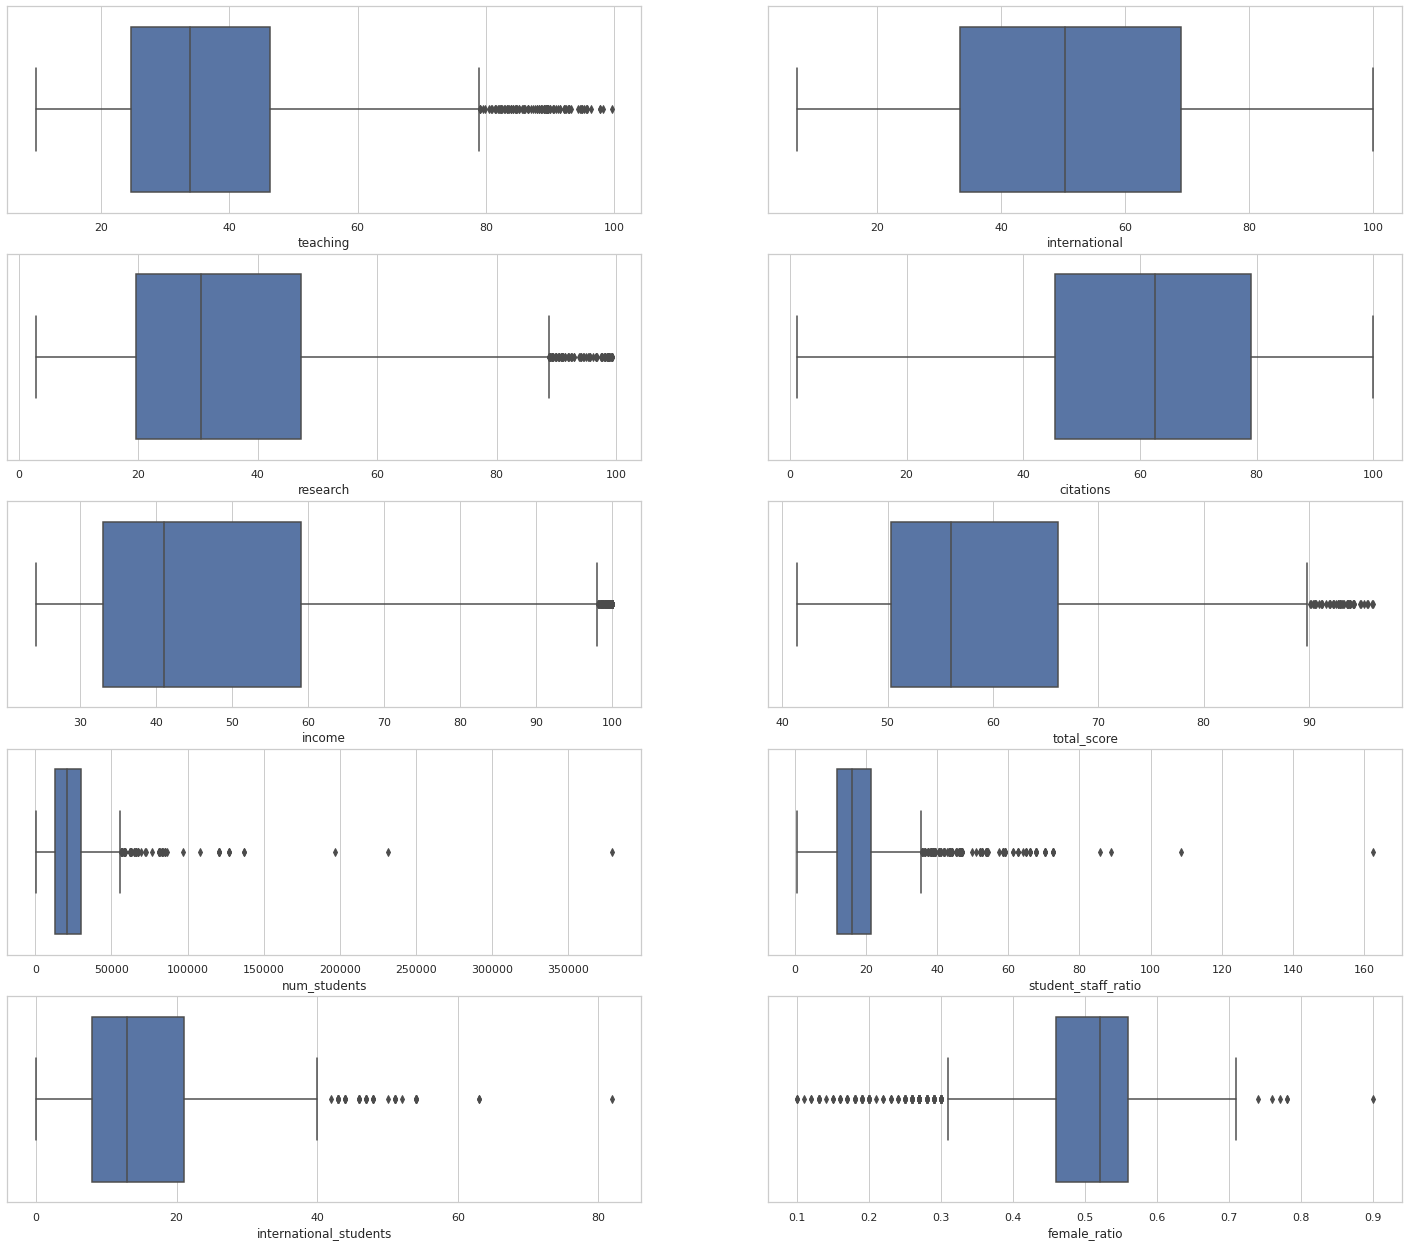

In [788]:
# Boxplots for numerical variables
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 22))

for i, col in enumerate(numerical_vars, 1):
  plt.subplot(5, 2, i)
  ax = sns.boxplot(x=data[col])

In [ ]:
# From the graphs


In [789]:
#checking for inconsistent capitalization
df = data
countries = []
for i in df['country']:
  if i not in countries:
    countries.append(i)
countries

['United States of America',
 'United Kingdom',
 'Switzerland',
 'Canada',
 'Hong Kong',
 'Japan',
 'South Korea',
 'Singapore',
 'Australia',
 'China',
 'France',
 'Sweden',
 'Germany',
 'Republic of Ireland',
 'Finland',
 'Taiwan',
 'South Africa',
 'Turkey',
 'Netherlands',
 'Belgium',
 'Denmark',
 'Norway',
 'Spain',
 'New Zealand',
 'Egypt',
 'Austria',
 'Israel',
 'Brazil',
 'Italy',
 'Russian Federation',
 'Greece',
 'Iceland',
 'Czech Republic',
 'India',
 'Poland',
 'Iran',
 'Portugal',
 'Thailand',
 'Chile',
 'Estonia',
 'Saudi Arabia',
 'Mexico',
 'Colombia',
 'Macau',
 'Morocco',
 'Luxembourg',
 'Unisted States of America',
 'Cyprus',
 'Unted Kingdom',
 'Uganda',
 'Malaysia',
 'Lebanon',
 'Romania',
 'Slovenia',
 'Pakistan',
 'Hungary',
 'United Arab Emirates',
 'Belarus',
 'Serbia',
 'Slovakia',
 'Bangladesh',
 'Ghana',
 'Nigeria',
 'Indonesia',
 'Jordan',
 'Latvia',
 'Kenya',
 'Argentina',
 'Qatar',
 'Oman',
 'Ukraine',
 'Lithuania']

In [790]:
print(df['world_rank'].head(10))

0     1
1     2
2     3
3     4
4     5
5     6
6     6
7     8
8     9
9    10
Name: world_rank, dtype: object
